In [1]:
%cd /home/vishnu/Downloads

/home/vishnu/Downloads


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
worldbank_data = pd.read_csv("api.csv")
worldbank_data.shape

(18994, 57)

In [3]:
#Dropping columns having all Nan Values
drop_columns = [col for col in worldbank_data if worldbank_data[col].isnull().sum()==len(worldbank_data)]
remove_columns=['url', 'location','GeoLocID', 'GeoLocName', 'Latitude', 'Longitude',
                 'Country','productlinetype','projectstatusdisplay','project_name','borrower',
                 'impagency','financier','sector2', 'sector3', 'sector4', 'sector5',
                'theme2', 'theme3', 'theme4', 'theme5']
wb_data = worldbank_data.drop(columns=drop_columns+remove_columns)
#Splitting countryname as it is repeating twice
wb_data['countryname'] = wb_data['countryname'].str.split(';')
wb_data['countryname'] = wb_data['countryname'].str[0]
#Changing Columns containing numeric to Numerical columns and Date columns accordingly
numeric_columns = ['lendprojectcost','ibrdcommamt','ibrdcommamt','idacommamt','totalamt','grantamt']
wb_data[numeric_columns]=wb_data[numeric_columns].replace(',','',regex=True)
wb_data[numeric_columns]=wb_data[numeric_columns].astype('float')
#Converting all the amount to Millions
wb_data[numeric_columns]=wb_data[numeric_columns]/1000000
#Converting date object columns to Date 
wb_data['boardapprovaldate'] = pd.to_datetime(wb_data['boardapprovaldate'],infer_datetime_format=True)
wb_data['closingdate'] = pd.to_datetime(wb_data['closingdate'],infer_datetime_format=True)
wb_data['approval_year']= wb_data['boardapprovaldate'].dt.year
wb_data['closingyear']= wb_data['closingdate'].dt.year

print(worldbank_data.shape)
print(wb_data.shape)

(18994, 57)
(18994, 24)


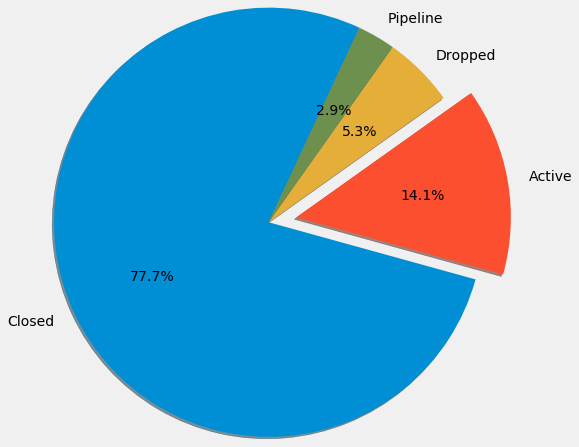

In [4]:
plt.style.use('fivethirtyeight')
#fig = plt.figure(figsize=(12,8),clear=True)
#Drawing pie chart to know the status of various projects
prj_status = wb_data['status'].value_counts(normalize=True).reset_index()
plt.pie('status',labels='index',data=prj_status,autopct='%1.1f%%',radius=2.3,explode=[0,0.3,0,0],shadow=True,startangle=65,);
#plt.text(x=-1.5,y=3.1,s="          Status of various projects of World Bank since 1947",weight='bold',va='top',size=14,ha='center');


In [5]:
#Removing data before 1960 and data about dropped projects
valid_data = wb_data[(wb_data.status!='Dropped')&(wb_data.approval_year>1959)]
valid_data.shape

(17085, 24)

In [6]:
wb_data['status'].value_counts()

Closed      14748
Active       2684
Dropped      1016
Pipeline      544
Name: status, dtype: int64

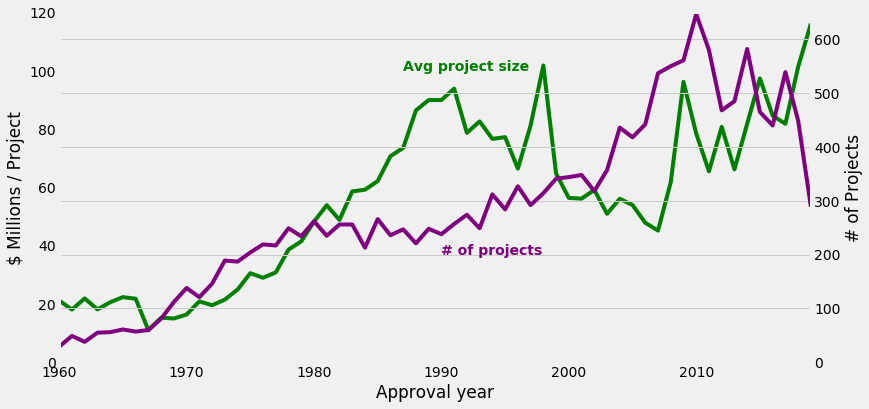

In [46]:
#Average loan given by world bank per year from 1960
fig,ax = plt.subplots(figsize=(12,6),clear=True)
#Drawing a line chart to visualise the data
valid_data.groupby('approval_year')['totalamt'].mean().plot(kind='line',ax=ax,color='green')
ax.set_ylim(0,120,auto=False)
ax1 = ax.twinx()
ax.set_ylabel("$ Millions / Project")
ax.set_xlabel("Approval year")
#Number of approved projects per year
valid_data.groupby('approval_year')['totalamt'].count().plot(kind='line',ax=ax1,color='purple')
ax1.set_ylim(0,650,auto=False)
ax1.set_ylabel('# of Projects')
ax.text(1987,100,"Avg project size",color='green',weight='bold')
ax1.text(1990,200,"# of projects",color='purple',weight='bold');
ax.grid(False)



In [8]:
#Using cut points segregate the data decade wise
cut_points = [1959,1969,1979,1989,1999,2009,2019]
decades = pd.cut(valid_data['approval_year'],cut_points)

In [9]:
#Getting the data for lending amount in each decade regionwise
region_decades = valid_data.pivot_table(index=decades,columns='regionname',values='totalamt',aggfunc='sum',dropna=True).drop(columns=['Other'])
region_decades

regionname,Africa,East Asia and Pacific,Europe and Central Asia,Latin America and Caribbean,Middle East and North Africa,South Asia
approval_year,,,,,,
"(1959, 1969]",1377.50,1865.30,1172.00,3023.80,689.40,2544.10
"(1969, 1979]",7800.70,10810.80,6575.40,13395.80,5901.60,10492.20
"(1979, 1989]",22655.30,33616.00,14509.30,40855.00,12421.50,34117.20
"(1989, 1999]",27720.97,60973.00,42269.08,57328.15,14544.08,30138.36
"(1999, 2009]",47958.89,36229.30,50327.03,63927.36,12412.99,45374.68
"(2009, 2019]",108185.21,63236.55,58427.00,65214.10,38315.54,78482.39


In [10]:
#converting the data into (%) for better understanding
region_decades = region_decades.apply(lambda x : x*100/sum(x), axis =1)
region_decades

regionname,Africa,East Asia and Pacific,Europe and Central Asia,Latin America and Caribbean,Middle East and North Africa,South Asia
approval_year,,,,,,
"(1959, 1969]",12.907488,17.478284,10.981906,28.333693,6.459835,23.838795
"(1969, 1979]",14.189154,19.664402,11.960383,24.366411,10.734768,19.084882
"(1979, 1989]",14.322997,21.252504,9.172982,25.829101,7.853046,21.569370
"(1989, 1999]",11.898758,26.171630,18.143289,24.607140,6.242801,12.936382
"(1999, 2009]",18.717107,14.139353,19.641330,24.949185,4.844467,17.708557
"(2009, 2019]",26.267422,15.353865,14.186104,15.834015,9.303032,19.055562


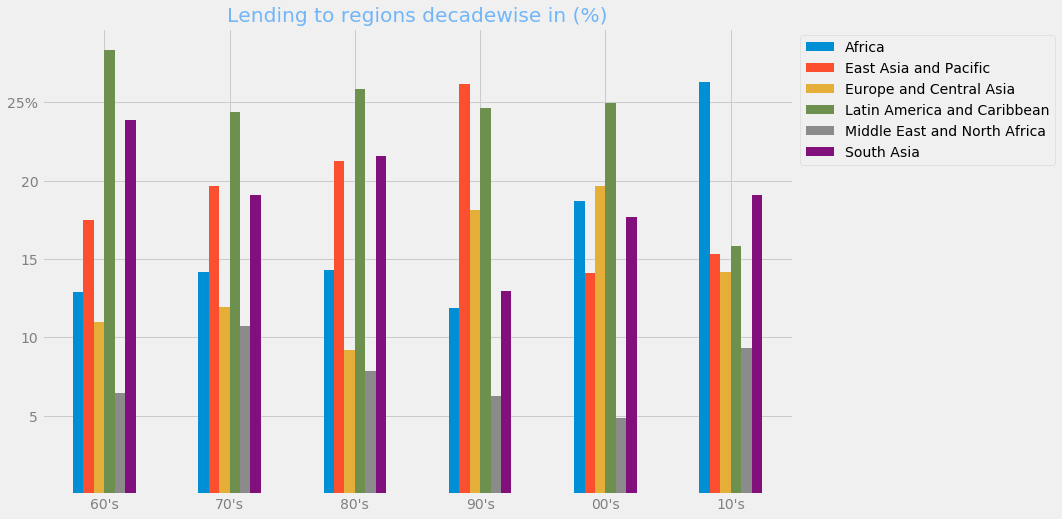

In [48]:
#Plotting the regionwise lending for each decade
fig,ax = plt.subplots(figsize=(12,8),clear=True)
region_decades.plot(kind='bar',ax=ax)
ax.set_xticklabels(labels=["60's","70's","80's","90's","00's","10's"],rotation='horizontal',color='grey')
ax.set_xlabel("")
ax.set_yticklabels(labels=["","5","10","15","20","25%","30%"],rotation='horizontal',color='grey');
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
ax.set_title("Lending to regions decadewise in (%)",color='dodgerblue',alpha=0.6);
ax.grid("major")

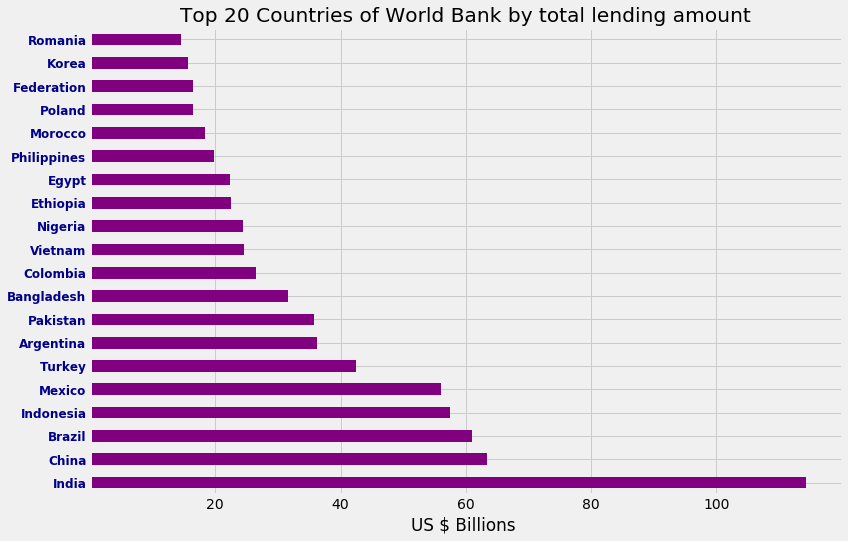

In [49]:
fig,ax = plt.subplots(figsize=(12,8),clear=True)
valid_data.groupby('countryname')['totalamt'].sum().sort_values(ascending=False)[:20].plot(kind='barh',ax=ax,color='purple')
ax.set_xticklabels(labels=["","20","40",'60','80','100'])
ax.set_yticklabels(labels=['India', 'China','Brazil', 'Indonesia','Mexico', 'Turkey', 'Argentina',
       'Pakistan', 'Bangladesh','Colombia', 'Vietnam','Nigeria','Ethiopia', 'Egypt','Philippines', 'Morocco',
       'Poland', 'Federation', 'Korea','Romania'],fontsize=12,color='darkblue',weight='bold')
ax.set_ylabel("")
ax.set_title("Top 20 Countries of World Bank by total lending amount")
ax.set_xlabel("US $ Billions ")
ax.grid("major")


In [22]:
valid_data.groupby('countryname')['totalamt'].sum().sort_values(ascending=False)[:20].index

Index(['Republic of India', 'People's Republic of China',
       'Federative Republic of Brazil', 'Republic of Indonesia',
       'United Mexican States', 'Republic of Turkey', 'Argentine Republic',
       'Islamic Republic of Pakistan', 'People's Republic of Bangladesh',
       'Republic of Colombia', 'Socialist Republic of Vietnam',
       'Federal Republic of Nigeria',
       'Federal Democratic Republic of Ethiopia', 'Arab Republic of Egypt',
       'Republic of the Philippines', 'Kingdom of Morocco',
       'Republic of Poland', 'Russian Federation', 'Republic of Korea',
       'Romania'],
      dtype='object', name='countryname')

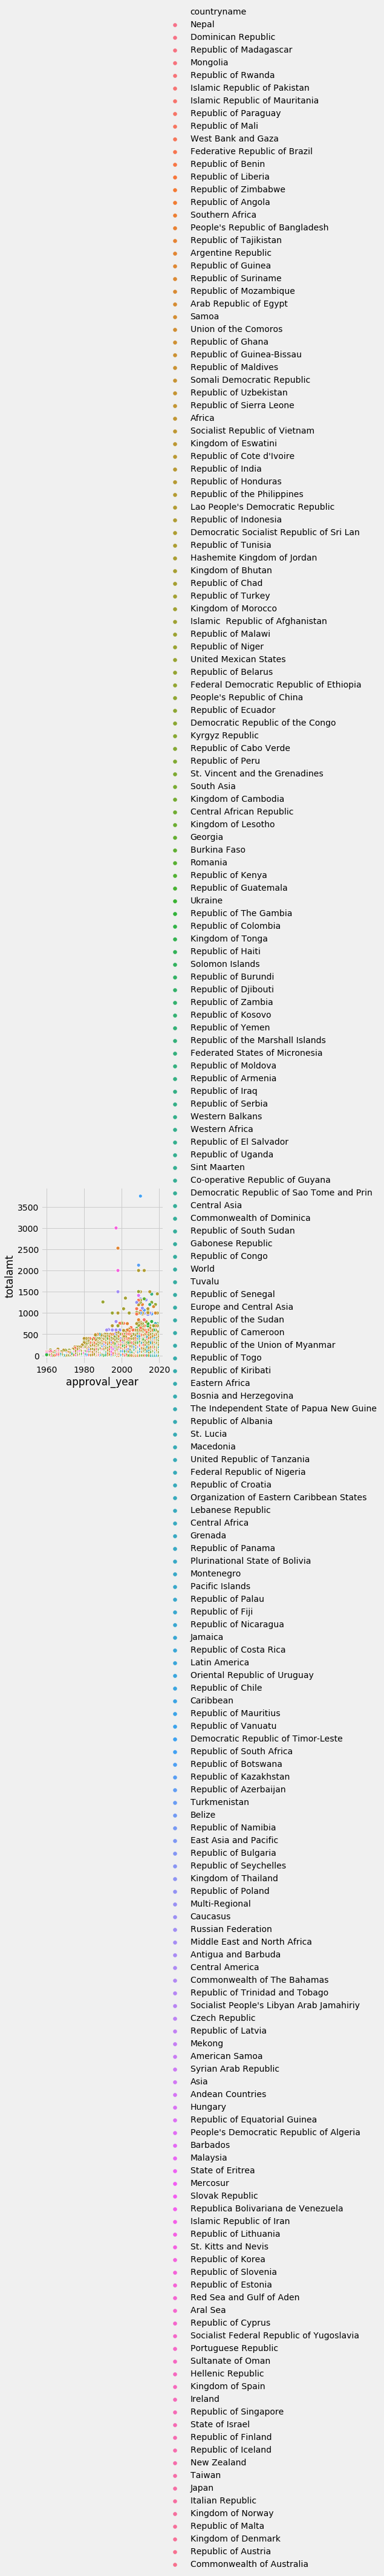

In [54]:
sns.relplot(x='approval_year',y='totalamt',hue='countryname',data=valid_data)

In [50]:
valid_data['totalamt'].sum()

1124887.58

In [23]:
(valid_data['totalamt']==0).astype(int).sum()

3393

In [25]:
(valid_data['grantamt']>0).astype(int).sum()

3182

In [31]:
valid_data[(valid_data['totalamt']==0)&(valid_data['grantamt']==0)][['regionname', 'countryname', 'lendinginstr','lendinginstrtype',
                                                                    'status', 'boardapprovaldate', 'closingdate','lendprojectcost',
                                                                    'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt','sector1',
                                                                    'sector', 'mjsector', 'theme1', 'goal']]

,regionname,countryname,lendinginstr,lendinginstrtype,status,boardapprovaldate,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,sector1,sector,mjsector,theme1,goal
44,East Asia and Pacific,Socialist Republic of Vietnam,Investment Project Financing,IN,Active,2019-06-27,NaT,262.30,0.0,0.0,0.0,0.0,!$!0,NaN,NaN,!$!0,NaN
403,Africa,Republic of Uganda,Investment Project Financing,IN,Active,2018-09-12,2021-06-30,25.00,0.0,0.0,0.0,0.0,Health!$!100!$!HG,Health;Health,Health;Health,!$!0,NaN
694,Latin America and Caribbean,Republic of Haiti,Investment Project Financing,IN,Active,2018-03-01,NaT,6.21,0.0,0.0,0.0,0.0,Other Agriculture; Fishing and Forestry!$!54!$!AZ,Other Agriculture; Fishing and Forestry;Other ...,Agriculture; Fishing and Forestry;Agriculture;...,!$!0,NaN
1324,Africa,Burkina Faso,Investment Project Financing,IN,Active,2016-12-07,NaT,6.00,0.0,0.0,0.0,0.0,Social Protection!$!70!$!SA,Social Protection;Social Protection;Public Adm...,Social Protection;Social Protection;Social Pro...,!$!0,NaN
1396,Africa,Republic of Liberia,Investment Project Financing,IN,Closed,2016-09-26,NaT,2.66,0.0,0.0,0.0,0.0,Central Government (Central Agencies)!$!100!$!BC,Central Government (Central Agencies);Central ...,Public Administration;Public Administration,Public expenditure; financial management and p...,Global Public Goods Priorities|Corporate Advoc...
1422,Africa,Republic of Senegal,Investment Project Financing,IN,Active,2016-08-24,NaT,11.05,0.0,0.0,0.0,0.0,Social Protection!$!100!$!SA,Social Protection;Social Protection,Social Protection;Social Protection,!$!0,NaN
1575,East Asia and Pacific,Republic of the Philippines,NaN,NaN,Active,2016-05-12,2021-08-31,44.00,0.0,0.0,0.0,0.0,Other Energy and Extractives!$!33!$!LZ,Other Energy and Extractives;Other Energy and ...,Energy and Extractives;Energy and Extractives;...,Infrastructure services for private sector dev...,Corporate Advocacy Priorities;Corporate Advoca...
1606,Europe and Central Asia,Ukraine,Investment Project Financing,IN,Active,2016-04-20,2020-06-03,3.60,0.0,0.0,0.0,0.0,Social Protection!$!89!$!SA,Social Protection;Social Protection;ICT Servic...,Social Protection;Social Protection;Informatio...,Other social development!$!10!$!62,Corporate Advocacy Priorities;Corporate Advoca...
1610,Africa,Republic of South Sudan,Investment Project Financing,IN,Active,2016-04-12,NaT,0.00,0.0,0.0,0.0,0.0,Crops!$!50!$!AH,Crops;Crops;Fisheries;Livestock,Agriculture; Fishing and Forestry;Agriculture;...,Nutrition and food security!$!70!$!68,Corporate Advocacy Priorities;Corporate Advoca...
1648,Middle East and North Africa,West Bank and Gaza,Investment Project Financing,IN,Active,2016-03-22,NaT,6.90,0.0,0.0,0.0,0.0,Sub-National Government!$!27!$!BH,Sub-National Government;Sub-National Governmen...,Public Administration;Public Administration;En...,Gender!$!5!$!59,Corporate Advocacy Priorities|Millennium Devel...


In [ ]:
#Loan amount based on mounth of Approval
wb_data.groupby('board_approval_month')['lendprojectcost'].sum().plot(kind='bar');

In [28]:
valid_data.columns

Index(['id', 'regionname', 'countryname', 'prodline', 'lendinginstr',
       'lendinginstrtype', 'envassesmentcategorycode', 'supplementprojectflg',
       'status', 'boardapprovaldate', 'board_approval_month', 'closingdate',
       'lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt',
       'sector1', 'sector', 'mjsector', 'theme1', 'goal', 'approval_year',
       'closingyear', 'loan_tenure'],
      dtype='object')

In [ ]:
#Amount given by Region
wb_data.groupby('regionname')['lendprojectcost'].sum().plot(kind='barh');

In [ ]:
#Amount lending by year of approval
wb_data.groupby('approval_year')['lendprojectcost'].sum().tail(25).plot(kind='bar');

In [ ]:
#Finding the major recepients of Grant Amount
wb_data.groupby('countryname')['grantamt'].sum().sort_values(ascending=False)[:30].plot(kind='bar');

In [ ]:
#Type of lending instrument for grant amount
wb_data.groupby('lendinginstr')['grantamt'].sum().plot(kind='bar');